In [1]:
from os import listdir
import shutil
import os
import os.path as path
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import json
import argparse
from luna.pretrained_models import models
from luna.featurevis import featurevis, images, image_reader
from tqdm import tqdm
import pandas as pd 


### Defining the pretrained model 

In [2]:
#model = models.model_cifar10()
model = models.model_inceptionv3()
#model = models.model_resnet50v2()
#model = models.model_inceptionv1()
#model = models.model_inceptionv1_slim()
#model = models.model_vgg16()
#model = models.model_vgg19()
#model = models.model_alexnet()
# model = tf.keras.applications.efficientnet.EfficientNetB0(
#     include_top=True, weights='imagenet', input_tensor=None,
#     input_shape=None, pooling=None, classes=1000,
#     classifier_activation='softmax'
# )
#model = models.model_mobilenetV2()
#model = models.model_efficientnet()



model.summary()    #in the case that we dont know the name of the layers.


Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## Feature vis for several layers & channels

In [6]:
# output folder for feature vis 
output_folder = r"C:\Users\lucaz\Documents\Fuzhi\GitHub\luna\luna\outputs\inceptionv3"

In [7]:
# example for defining several layers and channels for feature vis 
layer_name_comp_inception_v3 = ["mixed10"]
layer_name_cifar10 = ["conv2d_3", "conv2d_6", "conv2d_8", "conv2d_12"]
layer_name_mobilenet = ["block_7_expand", "block_10_expand", "block_14_expand", "block_16_expand"]
layer_name_efficientnet = ["block7b_se_expand", "block6b_se_expand", "block5c_se_expand", "block5b_se_expand"]
channel_num_comp = [0]

In [8]:
multiple_training = False
#def image(): return images.initialize_image_luna(299, fft=True, decorrelate=True)
#image = images.initialize_image_ref(32,32, decorrelate=True)
if multiple_training:
    model_name = "efficientnet"
    for layer_name, channel_num in zip(layer_name_comp_inception_v3, channel_num_comp):
        image = images.initialize_image(224, 224)
        print(image)
        opt_param = featurevis.OptimizationParameters(3500, 0.65)
        aug_param = featurevis.AugmentationParameters(blur= True, scale= True, pad_crop=False, flip=False,
                                                        rotation=False, noise=False, color_aug=False)
        #print(image)
        loss, image, loss_record, activation = featurevis.visualize_filter(image, model, layer_name, channel_num, opt_param, aug_param)
        #name = "feature_vis_{}_{}_{}".format(
        #    arch, layer_name.replace("/", "-"), channel_num)
        name = "feature_vis_{}_{}_{}".format(arch, layer_name, channel_num)
        print(loss)
        #print(loss_record)
        print(activation)
        #tf.Tensor(7.1122437, shape=(), dtype=float32)
        plt.plot(loss_record)
        #plt.ylim((-15, 0))
        plt.xlabel("Epochs")
        plt.ylabel("loss")
        plt.savefig("{}/loss_{}_{}_{}.png".format(output_folder, model_name, layer_name, channel_num))
        plt.close()
        images.save_image(image, name=name)
        image_reader.save_npy_as_png("{}.npy".format(name), output_folder)

In [9]:
image_size = 224
# define a noisy image
img = images.initialize_image(image_size, image_size)
def image_random(): return images.initialize_image_ref(224,224, fft=True, decorrelate=True)

initializing image


In [10]:
epochs = 2500
learning_rate = 0.7
model_name = 'inceptionV3'
channel_num= 0
layer_name = 'mixed10'



In [11]:
# image augmentation 
opt_param = featurevis.OptimizationParameters(epochs, learning_rate)
aug_param = featurevis.AugmentationParameters(blur= True, scale= True, pad_crop=False, 
                                              flip=False, rotation=False, noise=False, color_aug=False)
#print(image)


Starting Feature Vis Process
>> 100 %% 0 % 0 % 0 % %% 1 % % 1 % 1 %1 % 1 % 1 % 1 %%2 % 2 % 2 %% 2 % 2 % 2 % 2 %% 3 %%% 3 %3 % 3 %%3 %3 % % 4 %% 4 % 4 % 4 % %% % 5 % 5 % 5 % 5 % 5 % 5 %% 5 %6 % 6 % 6 % 6 % 6 %6 % 6 % 6 %% 7 % 7 %% 7 % 7 % 7 % 7 % 7 % 7 %8 % 8 % 8 % 8 % 8 % 8 % 9 %9 % 9 % 9 % 9 % 9 % 10 %10 % 10 % 10 % 10 % % 10 % 11 % 11 % 11 % 11 % 11 %11 % 11 %11 % 12 % 12 % 12 %12 % 12 % 12 % % 12 % 12 %12 % 12 % 12 %% 12 % 13 % 13 % 13 % 13 %%% 13 % 13 % 13 % 13 % 13 % 14 % 14 %14 %14 % 14 % 14 %14 %14 %14 % 14 %% 14 % 14 % 14 %15 % 15 %%%16 % 16 % 16 % 16 % 16 % 16 % 16 % 17 % 17 % 17 % 17 % 17 %17 %17 % 18 % 18 % 18 % 18 %18 % 18 % 18 % 18 % 19 % 19 % 19 % 19 %% 19 %% 19 % 19 %% 19 %%20 %% 20 % 20 % 20 % 20 % 20 %20 % 20 % 20 % 20 % 21 % 21 % 21 % 21 % 21 % 21 % 21 % 21 %22 % % 22 % 22 % 22 % 22 % 22 % 23 % 23 % 23 % 23 % 23 %23 %23 %% 24 %%24 % 24 % 24 % 24 % 25 % 25 % 25 % % 25 %25 % 26 % 26 % 26 % 26 % 26 % 26 % 26 %26 % 27 %% 27 % % 27 % 27 % 27 % % 27 % 27 %% 27 % 27 % 27 % 2

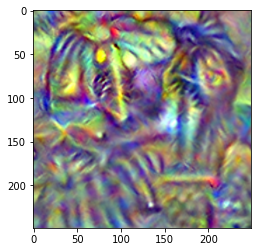

In [9]:
feature_vis_single_training = True

if feature_vis_single_training: 
    loss, image, loss_record, activation = featurevis.visualize_filter(img, model, layer_name, 
                                                                       channel_num, opt_param, aug_param)
#name = "feature_vis_{}_{}_{}".format(
#    arch, layer_name.replace("/", "-"), channel_num)
    name = "feature_vis_{}_{}_{}".format(model_name, layer_name, channel_num)
    images.save_image(image, name=name)
    image_reader.save_npy_as_png("{}.npy".format(name), output_folder)

    print(loss)
    #print(loss_record)
    print(activation)
plt.imshow(image)
plt.show()

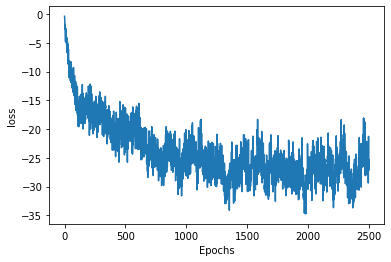

In [10]:
plotting = True
if plotting: 
    plt.plot(loss_record)
    #plt.ylim((-15, 0))
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.savefig("{}/loss_{}_{}_{}.png".format(output_folder, model_name, layer_name, channel_num))
    plt.show()

## Define intermediate layer for the main model

In [12]:
base_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

In [12]:
#print(img)
#img = preprocess_input(img)
img_pred = base_model.predict(img)
print(img_pred.shape)
noise_activation = tf.reduce_mean(img_pred[:, :, :, channel_num])
print(noise_activation)

(1, 5, 5, 2048)
tf.Tensor(0.36324075, shape=(), dtype=float32)


In [13]:
folders = [d for d in os.listdir(r'E:\Imagenet\train\train') if os.path.isdir(os.path.join(r'E:\Imagenet\train\train', d))]
print(folders)

['ILSVRC2013_train_extra0', 'ILSVRC2013_train_extra1', 'ILSVRC2013_train_extra10', 'ILSVRC2013_train_extra2', 'ILSVRC2013_train_extra3', 'ILSVRC2013_train_extra4', 'ILSVRC2013_train_extra5', 'ILSVRC2013_train_extra6', 'ILSVRC2013_train_extra7', 'ILSVRC2013_train_extra8', 'ILSVRC2013_train_extra9', 'ILSVRC2014_train_0000', 'ILSVRC2014_train_0001', 'ILSVRC2014_train_0002', 'ILSVRC2014_train_0003', 'ILSVRC2014_train_0004', 'ILSVRC2014_train_0005', 'ILSVRC2014_train_0006']


In [14]:
print(os.path.join(r'E:\Imagenet\train\train', folders[0]))

E:\Imagenet\train\train\ILSVRC2013_train_extra0


In [15]:
#import signal
#import multiprocessing

In [16]:
#def init_worker():
#    ''' Add KeyboardInterrupt exception to mutliprocessing workers '''
#    signal.signal(signal.SIGINT, signal.SIG_IGN)
    
#num_workers = 16
 

In [26]:
from tensorflow.keras.preprocessing import image
from joblib import Parallel, delayed
from datetime import datetime

#img_name = []
#activation_val = []
#pbar = tqdm(total = len(folders))

img_dir = r'E:\Imagenet\ILSVRC2017_DET\ILSVRC\Data\DET\test'
for folder in tqdm(folders[6:]): 
    img_dir = os.path.join(r'E:\Imagenet\train\train', folder)
    for filename in tqdm(listdir(img_dir)):
        img = image.load_img("{}\{}".format(img_dir, filename), target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        pred = model.predict(x)
        ################Todo:
        # reduce max and the crop the images across that range
        # Ask in slack how they crop and downsize
        ################
        activation = tf.reduce_mean(pred[:, :, :, channel_num])
        #print(activation)
        img_name.append(filename)
        activation_val.append(activation.numpy())

                        
    #img_activation.update({filename: activation.numpy()})
    #shutil.copy("{}\{}".format(img_dir, filename), r"C:\Users\lucaz\Documents\Fuzhi\GitHub\luna\luna\outputs\loss_result\loss_images")


  4%|███                                                                            | 390/9995 [00:16<06:24, 24.96it/s]


  8%|██████▏                                                                        | 786/9995 [00:32<08:42, 17.63it/s]


 12%|█████████▏                                                                    | 1182/9995 [00:48<05:54, 24.87it/s]


 16%|████████████▎                                                                 | 1578/9995 [01:05<06:03, 23.17it/s]


 20%|███████████████▍                                                              | 1974/9995 [01:21<05:30, 24.27it/s]


 24%|██████████████████▍                                                           | 2370/9995 [01:38<05:08, 24.73it/s]


 28%|█████████████████████▌                                                        | 2766/9995 [01:54<04:46, 25.22it/s]


 32%|████████████████████████▋                                                     | 3162/9995 [02:10<04:28, 25.44it/s]


 36%|███████████████████████████▊                                                  | 3558/9995 [02:27<04:24, 24.30it/s]


 40%|██████████████████████████████▊                                               | 3954/9995 [02:43<04:05, 24.60it/s]


 44%|█████████████████████████████████▉                                            | 4350/9995 [02:59<03:48, 24.66it/s]


 47%|█████████████████████████████████████                                         | 4746/9995 [03:16<03:29, 25.01it/s]


 51%|████████████████████████████████████████▏                                     | 5142/9995 [03:32<03:29, 23.16it/s]


 55%|███████████████████████████████████████████▏                                  | 5538/9995 [03:48<02:53, 25.72it/s]


 59%|██████████████████████████████████████████████▎                               | 5934/9995 [04:04<02:46, 24.33it/s]


 63%|█████████████████████████████████████████████████▍                            | 6330/9995 [04:21<02:25, 25.23it/s]


 67%|████████████████████████████████████████████████████▍                         | 6726/9995 [04:37<02:13, 24.54it/s]


 71%|███████████████████████████████████████████████████████▌                      | 7122/9995 [04:54<01:56, 24.62it/s]


 75%|██████████████████████████████████████████████████████████▋                   | 7518/9995 [05:10<01:39, 24.80it/s]


 79%|█████████████████████████████████████████████████████████████▊                | 7914/9995 [05:26<01:21, 25.39it/s]


 83%|████████████████████████████████████████████████████████████████▊             | 8310/9995 [05:43<01:08, 24.44it/s]


 87%|███████████████████████████████████████████████████████████████████▉          | 8706/9995 [05:59<00:52, 24.63it/s]


 91%|███████████████████████████████████████████████████████████████████████       | 9102/9995 [06:16<00:36, 24.41it/s]


 94%|█████████████████████████████████████████████████████████████████████████▌    | 9421/9995 [06:31<00:31, 18.40it/s]


 97%|███████████████████████████████████████████████████████████████████████████▋  | 9701/9995 [06:47<00:17, 16.98it/s]


100%|█████████████████████████████████████████████████████████████████████████████▊| 9975/9995 [07:02<00:01, 17.34it/s]


  3%|██                                                                             | 267/9996 [00:17<12:42, 12.76it/s]


  5%|████▏                                                                          | 533/9996 [00:35<10:24, 15.14it/s]


  8%|██████▎                                                                        | 797/9996 [00:54<10:05, 15.19it/s]


 11%|████████▎                                                                     | 1061/9996 [01:12<10:40, 13.96it/s]


 13%|██████████▎                                                                   | 1325/9996 [01:30<09:28, 15.25it/s]


 16%|████████████▍                                                                 | 1590/9996 [01:48<09:40, 14.48it/s]


 19%|██████████████▍                                                               | 1855/9996 [02:06<08:36, 15.78it/s]


 21%|████████████████▌                                                             | 2121/9996 [02:23<08:57, 14.66it/s]


 24%|██████████████████▋                                                           | 2387/9996 [02:41<08:18, 15.26it/s]


 27%|████████████████████▋                                                         | 2653/9996 [02:58<07:57, 15.37it/s]


 29%|██████████████████████▊                                                       | 2917/9996 [03:16<08:12, 14.36it/s]


 32%|████████████████████████▊                                                     | 3181/9996 [03:33<07:07, 15.93it/s]


 34%|██████████████████████████▉                                                   | 3447/9996 [03:50<07:41, 14.20it/s]


 37%|████████████████████████████▉                                                 | 3713/9996 [04:07<06:56, 15.09it/s]


 40%|███████████████████████████████                                               | 3979/9996 [04:24<06:35, 15.20it/s]


 42%|█████████████████████████████████                                             | 4243/9996 [04:41<06:03, 15.84it/s]


 45%|███████████████████████████████████▏                                          | 4508/9996 [04:58<05:27, 16.75it/s]


 48%|█████████████████████████████████████▏                                        | 4772/9996 [05:15<05:35, 15.58it/s]


 50%|███████████████████████████████████████▎                                      | 5037/9996 [05:32<05:07, 16.11it/s]


 53%|█████████████████████████████████████████▎                                    | 5302/9996 [05:48<04:56, 15.85it/s]


 56%|███████████████████████████████████████████▍                                  | 5566/9996 [06:05<04:23, 16.81it/s]


 58%|█████████████████████████████████████████████▌                                | 5833/9996 [06:22<04:21, 15.93it/s]


 61%|███████████████████████████████████████████████▌                              | 6103/9996 [06:38<03:52, 16.75it/s]


 64%|█████████████████████████████████████████████████▋                            | 6369/9996 [06:55<03:40, 16.43it/s]


 66%|███████████████████████████████████████████████████▊                          | 6637/9996 [07:11<04:29, 12.49it/s]


 69%|█████████████████████████████████████████████████████▊                        | 6903/9996 [07:27<03:29, 14.75it/s]


 72%|███████████████████████████████████████████████████████▉                      | 7169/9996 [07:44<02:45, 17.12it/s]


 74%|██████████████████████████████████████████████████████████                    | 7433/9996 [08:00<02:42, 15.77it/s]


 77%|████████████████████████████████████████████████████████████                  | 7697/9996 [08:17<02:26, 15.69it/s]


 80%|██████████████████████████████████████████████████████████████▏               | 7963/9996 [08:33<01:59, 17.04it/s]


 82%|████████████████████████████████████████████████████████████████▏             | 8229/9996 [08:50<01:56, 15.22it/s]


 85%|██████████████████████████████████████████████████████████████████▎           | 8494/9996 [09:06<01:28, 16.93it/s]


 88%|████████████████████████████████████████████████████████████████████▎         | 8759/9996 [09:22<01:18, 15.68it/s]


 90%|██████████████████████████████████████████████████████████████████████▍       | 9025/9996 [09:38<00:56, 17.06it/s]


 93%|████████████████████████████████████████████████████████████████████████▌     | 9293/9996 [09:54<00:39, 17.65it/s]


 96%|██████████████████████████████████████████████████████████████████████████▌   | 9557/9996 [10:10<00:27, 16.17it/s]


 98%|████████████████████████████████████████████████████████████████████████████▋ | 9821/9996 [10:27<00:11, 15.89it/s]


  1%|▋                                                                              | 89/10000 [00:06<10:44, 15.39it/s]


  4%|██▊                                                                           | 358/10000 [00:26<12:01, 13.37it/s]


  6%|████▊                                                                         | 622/10000 [00:45<11:27, 13.65it/s]


  9%|██████▉                                                                       | 886/10000 [01:05<10:59, 13.83it/s]


 12%|████████▊                                                                    | 1152/10000 [01:24<11:40, 12.63it/s]


 14%|██████████▉                                                                  | 1417/10000 [01:42<09:34, 14.94it/s]


 17%|████████████▉                                                                | 1681/10000 [02:01<10:12, 13.59it/s]


 19%|██████████████▉                                                              | 1948/10000 [02:20<08:48, 15.25it/s]


 22%|█████████████████                                                            | 2214/10000 [02:38<08:47, 14.76it/s]


 25%|███████████████████                                                          | 2479/10000 [02:56<08:33, 14.64it/s]


 27%|█████████████████████▏                                                       | 2745/10000 [03:14<07:49, 15.46it/s]


 30%|███████████████████████▏                                                     | 3011/10000 [03:31<07:38, 15.23it/s]


 33%|█████████████████████████▏                                                   | 3275/10000 [03:49<07:08, 15.68it/s]


 35%|███████████████████████████▎                                                 | 3541/10000 [04:06<06:54, 15.58it/s]


 38%|█████████████████████████████▎                                               | 3805/10000 [04:24<09:05, 11.36it/s]


 41%|███████████████████████████████▎                                             | 4073/10000 [04:41<06:07, 16.14it/s]


 43%|█████████████████████████████████▍                                           | 4337/10000 [04:58<06:25, 14.69it/s]


 46%|███████████████████████████████████▍                                         | 4602/10000 [05:15<05:30, 16.34it/s]


 49%|█████████████████████████████████████▍                                       | 4869/10000 [05:32<05:17, 16.17it/s]


 51%|███████████████████████████████████████▌                                     | 5133/10000 [05:48<04:56, 16.42it/s]


 54%|█████████████████████████████████████████▌                                   | 5401/10000 [06:05<04:43, 16.21it/s]


 57%|███████████████████████████████████████████▋                                 | 5666/10000 [06:21<04:13, 17.09it/s]


 59%|█████████████████████████████████████████████▋                               | 5932/10000 [06:38<04:07, 16.44it/s]


 62%|███████████████████████████████████████████████▋                             | 6201/10000 [06:54<04:10, 15.15it/s]


 65%|█████████████████████████████████████████████████▊                           | 6467/10000 [07:11<03:23, 17.39it/s]


 67%|███████████████████████████████████████████████████▊                         | 6734/10000 [07:27<03:28, 15.64it/s]


 70%|█████████████████████████████████████████████████████▉                       | 7001/10000 [07:44<02:54, 17.18it/s]


 73%|███████████████████████████████████████████████████████▉                     | 7267/10000 [08:00<02:40, 17.05it/s]


 75%|██████████████████████████████████████████████████████████                   | 7535/10000 [08:16<02:27, 16.72it/s]


 78%|████████████████████████████████████████████████████████████                 | 7800/10000 [08:32<02:11, 16.69it/s]


 81%|██████████████████████████████████████████████████████████████               | 8067/10000 [08:48<01:48, 17.82it/s]


 83%|████████████████████████████████████████████████████████████████▏            | 8336/10000 [09:05<01:34, 17.59it/s]


 86%|██████████████████████████████████████████████████████████████████▎          | 8605/10000 [09:21<01:18, 17.88it/s]


 89%|████████████████████████████████████████████████████████████████████▎        | 8875/10000 [09:37<01:09, 16.28it/s]


 91%|██████████████████████████████████████████████████████████████████████▍      | 9141/10000 [09:53<00:49, 17.32it/s]


 94%|████████████████████████████████████████████████████████████████████████▍    | 9405/10000 [10:09<00:34, 17.19it/s]


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9672/10000 [10:25<00:19, 17.00it/s]


 99%|████████████████████████████████████████████████████████████████████████████▌| 9938/10000 [10:42<00:04, 15.18it/s]


  2%|█▌                                                                            | 200/10000 [00:13<11:24, 14.32it/s]


  5%|███▋                                                                          | 465/10000 [00:32<10:23, 15.30it/s]


  7%|█████▋                                                                        | 729/10000 [00:50<10:54, 14.17it/s]


 10%|███████▊                                                                      | 996/10000 [01:08<09:31, 15.75it/s]


 13%|█████████▋                                                                   | 1260/10000 [01:26<09:03, 16.08it/s]


 15%|███████████▋                                                                 | 1524/10000 [01:43<09:17, 15.20it/s]


 18%|█████████████▊                                                               | 1789/10000 [02:01<09:09, 14.93it/s]


 21%|███████████████▊                                                             | 2053/10000 [02:18<08:37, 15.37it/s]


 23%|█████████████████▊                                                           | 2318/10000 [02:36<07:53, 16.24it/s]


 26%|███████████████████▉                                                         | 2585/10000 [02:53<07:29, 16.48it/s]


 28%|█████████████████████▉                                                       | 2849/10000 [03:11<08:06, 14.70it/s]


 31%|███████████████████████▉                                                     | 3116/10000 [03:27<06:45, 16.99it/s]


 34%|██████████████████████████                                                   | 3382/10000 [03:45<06:48, 16.21it/s]


 36%|████████████████████████████                                                 | 3648/10000 [04:01<07:05, 14.91it/s]


 39%|██████████████████████████████▏                                              | 3913/10000 [04:18<06:33, 15.46it/s]


 42%|████████████████████████████████▏                                            | 4179/10000 [04:35<05:48, 16.72it/s]


 44%|██████████████████████████████████▏                                          | 4444/10000 [04:52<05:30, 16.80it/s]


 47%|████████████████████████████████████▎                                        | 4710/10000 [05:08<05:38, 15.65it/s]


 50%|██████████████████████████████████████▎                                      | 4974/10000 [05:25<05:05, 16.45it/s]


 52%|████████████████████████████████████████▎                                    | 5240/10000 [05:42<04:52, 16.28it/s]


 55%|██████████████████████████████████████████▍                                  | 5504/10000 [05:58<04:23, 17.04it/s]


 58%|████████████████████████████████████████████▍                                | 5776/10000 [06:14<04:09, 16.92it/s]


 60%|██████████████████████████████████████████████▌                              | 6040/10000 [06:31<03:58, 16.63it/s]


 63%|████████████████████████████████████████████████▌                            | 6308/10000 [06:47<05:25, 11.36it/s]


 66%|██████████████████████████████████████████████████▌                          | 6574/10000 [07:04<03:37, 15.73it/s]


 68%|████████████████████████████████████████████████████▋                        | 6838/10000 [07:20<03:11, 16.48it/s]


 71%|██████████████████████████████████████████████████████▋                      | 7104/10000 [07:37<03:07, 15.48it/s]


 74%|████████████████████████████████████████████████████████▊                    | 7371/10000 [07:53<02:36, 16.85it/s]


 76%|██████████████████████████████████████████████████████████▊                  | 7635/10000 [08:09<02:25, 16.20it/s]


 79%|████████████████████████████████████████████████████████████▊                | 7903/10000 [08:25<01:58, 17.72it/s]


 82%|██████████████████████████████████████████████████████████████▉              | 8169/10000 [08:41<01:48, 16.89it/s]


 84%|████████████████████████████████████████████████████████████████▉            | 8435/10000 [08:58<01:29, 17.45it/s]


 87%|██████████████████████████████████████████████████████████████████▉          | 8701/10000 [09:14<01:17, 16.67it/s]


 90%|█████████████████████████████████████████████████████████████████████        | 8969/10000 [09:30<01:02, 16.57it/s]


 92%|███████████████████████████████████████████████████████████████████████      | 9234/10000 [09:46<00:46, 16.39it/s]


 95%|█████████████████████████████████████████████████████████████████████████▏   | 9499/10000 [10:03<00:31, 16.16it/s]


 98%|███████████████████████████████████████████████████████████████████████████▏ | 9764/10000 [10:19<00:14, 16.38it/s]


  0%|▏                                                                               | 26/9999 [00:01<11:34, 14.35it/s]


  3%|██▎                                                                            | 291/9999 [00:20<10:00, 16.17it/s]


  6%|████▍                                                                          | 555/9999 [00:38<10:31, 14.95it/s]


  8%|██████▍                                                                        | 822/9999 [00:56<09:18, 16.42it/s]


 11%|████████▍                                                                     | 1086/9999 [01:14<09:39, 15.38it/s]


 14%|██████████▌                                                                   | 1350/9999 [01:32<09:08, 15.76it/s]


 16%|████████████▌                                                                 | 1615/9999 [01:50<08:53, 15.72it/s]


 19%|██████████████▋                                                               | 1879/9999 [02:07<09:11, 14.73it/s]


 21%|████████████████▋                                                             | 2143/9999 [02:25<08:35, 15.25it/s]


 24%|██████████████████▊                                                           | 2408/9999 [02:42<07:52, 16.07it/s]


 27%|████████████████████▊                                                         | 2673/9999 [02:59<07:06, 17.18it/s]


 29%|██████████████████████▉                                                       | 2942/9999 [03:16<11:05, 10.61it/s]


 32%|█████████████████████████                                                     | 3209/9999 [03:33<08:25, 13.42it/s]


 35%|███████████████████████████▏                                                  | 3478/9999 [03:50<06:56, 15.67it/s]


 37%|█████████████████████████████▏                                                | 3744/9999 [04:06<06:29, 16.05it/s]


 40%|███████████████████████████████▎                                              | 4009/9999 [04:23<05:57, 16.75it/s]


 43%|█████████████████████████████████▎                                            | 4274/9999 [04:40<05:45, 16.55it/s]


 45%|███████████████████████████████████▍                                          | 4539/9999 [04:56<05:22, 16.93it/s]


 48%|█████████████████████████████████████▍                                        | 4805/9999 [05:13<05:12, 16.60it/s]


 51%|███████████████████████████████████████▌                                      | 5076/9999 [05:29<04:51, 16.90it/s]


 53%|█████████████████████████████████████████▋                                    | 5343/9999 [05:45<04:28, 17.37it/s]


 56%|███████████████████████████████████████████▊                                  | 5613/9999 [06:01<04:15, 17.19it/s]


 59%|█████████████████████████████████████████████▉                                | 5881/9999 [06:17<03:56, 17.43it/s]


 61%|███████████████████████████████████████████████▉                              | 6149/9999 [06:33<03:45, 17.04it/s]


 64%|██████████████████████████████████████████████████                            | 6416/9999 [06:49<03:30, 17.06it/s]


 67%|████████████████████████████████████████████████████▏                         | 6683/9999 [07:05<03:05, 17.89it/s]


 69%|██████████████████████████████████████████████████████▏                       | 6949/9999 [07:20<02:54, 17.52it/s]


 72%|████████████████████████████████████████████████████████▎                     | 7216/9999 [07:36<02:36, 17.77it/s]


 75%|██████████████████████████████████████████████████████████▍                   | 7484/9999 [07:52<02:24, 17.36it/s]


 78%|████████████████████████████████████████████████████████████▌                 | 7757/9999 [08:08<02:01, 18.51it/s]


 80%|██████████████████████████████████████████████████████████████▌               | 8026/9999 [08:23<01:57, 16.80it/s]


 83%|████████████████████████████████████████████████████████████████▋             | 8292/9999 [08:39<01:40, 16.93it/s]


 86%|██████████████████████████████████████████████████████████████████▊           | 8561/9999 [08:54<01:27, 16.34it/s]


 88%|████████████████████████████████████████████████████████████████████▊         | 8827/9999 [09:10<01:22, 14.15it/s]


 91%|██████████████████████████████████████████████████████████████████████▉       | 9094/9999 [09:26<00:54, 16.63it/s]


 94%|█████████████████████████████████████████████████████████████████████████     | 9365/9999 [09:42<00:38, 16.61it/s]


 96%|███████████████████████████████████████████████████████████████████████████▏  | 9635/9999 [09:58<00:19, 18.60it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▏| 9902/9999 [10:13<00:05, 16.42it/s]


  2%|█▎                                                                             | 167/9999 [00:11<12:09, 13.47it/s]


  4%|███▍                                                                           | 431/9999 [00:30<10:43, 14.88it/s]


  7%|█████▌                                                                         | 698/9999 [00:48<10:20, 14.98it/s]


 10%|███████▌                                                                       | 962/9999 [01:07<10:26, 14.41it/s]


 12%|█████████▌                                                                    | 1228/9999 [01:25<09:54, 14.76it/s]


 15%|███████████▋                                                                  | 1494/9999 [01:43<10:38, 13.32it/s]


 18%|█████████████▋                                                                | 1759/9999 [02:01<09:01, 15.22it/s]


 20%|███████████████▊                                                              | 2025/9999 [02:19<08:58, 14.82it/s]


 23%|█████████████████▊                                                            | 2291/9999 [02:36<08:28, 15.16it/s]


 26%|███████████████████▉                                                          | 2557/9999 [02:53<08:19, 14.89it/s]


 28%|██████████████████████                                                        | 2822/9999 [03:11<07:43, 15.47it/s]


 31%|████████████████████████                                                      | 3086/9999 [03:28<07:56, 14.50it/s]


 34%|██████████████████████████▏                                                   | 3350/9999 [03:45<07:20, 15.11it/s]


 36%|████████████████████████████▏                                                 | 3615/9999 [04:03<06:14, 17.05it/s]


 39%|██████████████████████████████▎                                               | 3880/9999 [04:20<06:09, 16.58it/s]


 41%|████████████████████████████████▎                                             | 4146/9999 [04:37<05:54, 16.53it/s]


 44%|██████████████████████████████████▍                                           | 4414/9999 [04:54<05:45, 16.16it/s]


 47%|████████████████████████████████████▌                                         | 4681/9999 [05:11<05:35, 15.84it/s]


 49%|██████████████████████████████████████▌                                       | 4947/9999 [05:27<08:21, 10.07it/s]


 52%|████████████████████████████████████████▋                                     | 5213/9999 [05:44<05:03, 15.77it/s]


 55%|██████████████████████████████████████████▋                                   | 5479/9999 [06:01<04:58, 15.13it/s]


 57%|████████████████████████████████████████████▊                                 | 5745/9999 [06:17<04:23, 16.14it/s]


 60%|██████████████████████████████████████████████▉                               | 6012/9999 [06:34<04:06, 16.18it/s]


 63%|████████████████████████████████████████████████▉                             | 6277/9999 [06:50<03:43, 16.66it/s]


 65%|███████████████████████████████████████████████████                           | 6542/9999 [07:06<03:27, 16.67it/s]


 68%|█████████████████████████████████████████████████████                         | 6806/9999 [07:23<03:15, 16.37it/s]


 71%|███████████████████████████████████████████████████████▏                      | 7075/9999 [07:39<02:44, 17.83it/s]


 73%|█████████████████████████████████████████████████████████▎                    | 7342/9999 [07:55<02:34, 17.18it/s]


 76%|███████████████████████████████████████████████████████████▎                  | 7607/9999 [08:11<02:25, 16.39it/s]


 79%|█████████████████████████████████████████████████████████████▍                | 7871/9999 [08:27<02:10, 16.37it/s]


 81%|███████████████████████████████████████████████████████████████▍              | 8138/9999 [08:43<01:53, 16.41it/s]


 84%|█████████████████████████████████████████████████████████████████▌            | 8405/9999 [08:59<01:39, 15.95it/s]


 87%|███████████████████████████████████████████████████████████████████▋          | 8671/9999 [09:15<01:22, 16.11it/s]


 89%|█████████████████████████████████████████████████████████████████████▋        | 8938/9999 [09:31<01:01, 17.28it/s]


 92%|███████████████████████████████████████████████████████████████████████▊      | 9203/9999 [09:48<00:48, 16.56it/s]


 95%|█████████████████████████████████████████████████████████████████████████▊    | 9469/9999 [10:04<00:30, 17.42it/s]


 97%|███████████████████████████████████████████████████████████████████████████▉  | 9735/9999 [10:20<00:15, 16.91it/s]


  0%|                                                                                | 2/10000 [00:00<10:49, 15.40it/s]


  3%|██                                                                            | 267/10000 [00:18<11:05, 14.63it/s]


  5%|████▏                                                                         | 532/10000 [00:36<10:20, 15.27it/s]


  8%|██████▏                                                                       | 796/10000 [00:53<10:09, 15.09it/s]


 11%|████████▏                                                                    | 1063/10000 [01:11<09:40, 15.38it/s]


 13%|██████████▏                                                                  | 1330/10000 [01:29<12:08, 11.91it/s]


 16%|████████████▎                                                                | 1597/10000 [01:46<09:19, 15.02it/s]


 19%|██████████████▎                                                              | 1864/10000 [02:03<07:55, 17.11it/s]


 21%|████████████████▍                                                            | 2132/10000 [02:20<07:46, 16.86it/s]


 24%|██████████████████▍                                                          | 2398/10000 [02:36<07:34, 16.73it/s]


 27%|████████████████████▌                                                        | 2664/10000 [02:53<07:07, 17.15it/s]


 29%|██████████████████████▌                                                      | 2932/10000 [03:09<06:59, 16.83it/s]


 32%|████████████████████████▌                                                    | 3197/10000 [03:25<07:14, 15.64it/s]


 35%|██████████████████████████▋                                                  | 3462/10000 [03:41<06:44, 16.16it/s]


 37%|████████████████████████████▋                                                | 3733/10000 [03:58<06:39, 15.68it/s]


 40%|██████████████████████████████▊                                              | 4005/10000 [04:14<05:33, 17.96it/s]


 43%|████████████████████████████████▉                                            | 4271/10000 [04:30<05:22, 17.79it/s]


 45%|██████████████████████████████████▉                                          | 4545/10000 [04:46<05:18, 17.11it/s]


 48%|█████████████████████████████████████                                        | 4817/10000 [05:02<04:58, 17.36it/s]


 51%|███████████████████████████████████████▏                                     | 5086/10000 [05:18<05:13, 15.67it/s]


 54%|█████████████████████████████████████████▎                                   | 5359/10000 [05:33<04:15, 18.17it/s]


 56%|███████████████████████████████████████████▎                                 | 5630/10000 [05:49<04:02, 17.99it/s]


 59%|█████████████████████████████████████████████▌                               | 5911/10000 [06:05<04:49, 14.14it/s]


 62%|███████████████████████████████████████████████▌                             | 6183/10000 [06:22<03:51, 16.50it/s]


 65%|█████████████████████████████████████████████████▋                           | 6456/10000 [06:38<03:24, 17.29it/s]


 67%|███████████████████████████████████████████████████▊                         | 6724/10000 [06:53<03:10, 17.17it/s]


 70%|█████████████████████████████████████████████████████▊                       | 6993/10000 [07:09<02:52, 17.42it/s]


 73%|███████████████████████████████████████████████████████▉                     | 7260/10000 [07:24<02:28, 18.43it/s]


 75%|█████████████████████████████████████████████████████████▉                   | 7532/10000 [07:40<02:14, 18.30it/s]


 78%|████████████████████████████████████████████████████████████                 | 7800/10000 [07:56<02:06, 17.34it/s]


 81%|██████████████████████████████████████████████████████████████▏              | 8072/10000 [08:11<01:41, 18.97it/s]


 83%|████████████████████████████████████████████████████████████████▎            | 8347/10000 [08:26<01:31, 18.08it/s]


 86%|██████████████████████████████████████████████████████████████████▎          | 8618/10000 [08:42<01:18, 17.60it/s]


 89%|████████████████████████████████████████████████████████████████████▍        | 8888/10000 [08:58<01:04, 17.30it/s]


 92%|██████████████████████████████████████████████████████████████████████▌      | 9157/10000 [09:14<00:48, 17.41it/s]


 94%|████████████████████████████████████████████████████████████████████████▌    | 9425/10000 [09:29<00:30, 19.15it/s]


 97%|██████████████████████████████████████████████████████████████████████████▋  | 9694/10000 [09:44<00:16, 18.51it/s]


100%|████████████████████████████████████████████████████████████████████████████▋| 9966/10000 [09:59<00:01, 18.26it/s]


  2%|█▊                                                                            | 228/10000 [00:16<12:14, 13.31it/s]


  5%|███▊                                                                          | 493/10000 [00:36<12:30, 12.67it/s]


  8%|█████▉                                                                        | 758/10000 [00:55<10:36, 14.53it/s]


 10%|███████▉                                                                     | 1024/10000 [01:14<10:04, 14.84it/s]


 13%|█████████▉                                                                   | 1290/10000 [01:32<10:12, 14.22it/s]


 16%|███████████▉                                                                 | 1557/10000 [01:51<09:55, 14.17it/s]


 18%|██████████████                                                               | 1824/10000 [02:09<08:23, 16.25it/s]


 21%|████████████████                                                             | 2090/10000 [02:27<09:07, 14.44it/s]


 24%|██████████████████▏                                                          | 2357/10000 [02:45<07:48, 16.32it/s]


 26%|████████████████████▏                                                        | 2626/10000 [03:03<07:46, 15.81it/s]


 29%|██████████████████████▎                                                      | 2891/10000 [03:19<07:26, 15.93it/s]


 32%|████████████████████████▎                                                    | 3159/10000 [03:36<06:59, 16.30it/s]


 34%|██████████████████████████▍                                                  | 3428/10000 [03:53<05:51, 18.67it/s]


 37%|████████████████████████████▍                                                | 3701/10000 [04:10<06:29, 16.18it/s]


 40%|██████████████████████████████▌                                              | 3977/10000 [04:26<06:01, 16.66it/s]


 42%|████████████████████████████████▋                                            | 4248/10000 [04:43<05:20, 17.94it/s]


 45%|██████████████████████████████████▊                                          | 4518/10000 [04:59<04:52, 18.74it/s]


 48%|████████████████████████████████████▉                                        | 4789/10000 [05:15<04:43, 18.39it/s]


 51%|██████████████████████████████████████▉                                      | 5058/10000 [05:31<04:47, 17.17it/s]


 53%|█████████████████████████████████████████                                    | 5326/10000 [05:46<04:20, 17.93it/s]


 56%|███████████████████████████████████████████                                  | 5594/10000 [06:02<07:08, 10.28it/s]


 59%|█████████████████████████████████████████████▏                               | 5868/10000 [06:18<04:35, 14.97it/s]


 61%|███████████████████████████████████████████████▎                             | 6145/10000 [06:34<03:30, 18.28it/s]


 64%|█████████████████████████████████████████████████▍                           | 6419/10000 [06:49<03:19, 17.98it/s]


 67%|███████████████████████████████████████████████████▍                         | 6688/10000 [07:05<03:17, 16.75it/s]


 70%|█████████████████████████████████████████████████████▌                       | 6956/10000 [07:21<02:48, 18.04it/s]


 72%|███████████████████████████████████████████████████████▌                     | 7224/10000 [07:36<02:31, 18.37it/s]


 75%|█████████████████████████████████████████████████████████▋                   | 7498/10000 [07:51<02:19, 17.92it/s]


 78%|███████████████████████████████████████████████████████████▊                 | 7774/10000 [08:07<02:03, 18.02it/s]


 81%|█████████████████████████████████████████████████████████████▉               | 8051/10000 [08:22<01:45, 18.50it/s]


 83%|████████████████████████████████████████████████████████████████             | 8323/10000 [08:38<01:27, 19.15it/s]


 86%|██████████████████████████████████████████████████████████████████▏          | 8596/10000 [08:53<01:15, 18.55it/s]


 89%|████████████████████████████████████████████████████████████████████▎        | 8867/10000 [09:09<01:03, 17.92it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 9138/10000 [09:24<00:45, 19.09it/s]


 94%|████████████████████████████████████████████████████████████████████████▍    | 9405/10000 [09:39<00:32, 18.36it/s]


 97%|██████████████████████████████████████████████████████████████████████████▌  | 9683/10000 [09:55<00:17, 18.64it/s]


100%|████████████████████████████████████████████████████████████████████████████▋| 9956/10000 [10:10<00:02, 19.09it/s]


  2%|█▋                                                                            | 219/10000 [00:16<12:19, 13.23it/s]


  5%|███▊                                                                          | 485/10000 [00:35<11:06, 14.28it/s]


  8%|█████▊                                                                        | 751/10000 [00:54<10:31, 14.64it/s]


 10%|███████▊                                                                     | 1017/10000 [01:13<10:31, 14.22it/s]


 13%|█████████▊                                                                   | 1282/10000 [01:31<08:54, 16.31it/s]


 15%|███████████▉                                                                 | 1546/10000 [01:50<09:07, 15.44it/s]


 18%|█████████████▉                                                               | 1815/10000 [02:08<08:54, 15.31it/s]


 21%|████████████████                                                             | 2084/10000 [02:26<08:27, 15.60it/s]


 24%|██████████████████                                                           | 2352/10000 [02:43<07:28, 17.07it/s]


 26%|████████████████████▏                                                        | 2622/10000 [03:00<08:10, 15.03it/s]


 29%|██████████████████████▏                                                      | 2889/10000 [03:18<07:22, 16.08it/s]


 32%|████████████████████████▎                                                    | 3156/10000 [03:35<07:12, 15.82it/s]


 34%|██████████████████████████▍                                                  | 3426/10000 [03:52<06:40, 16.41it/s]


 37%|████████████████████████████▍                                                | 3691/10000 [04:09<06:27, 16.27it/s]


 40%|██████████████████████████████▍                                              | 3955/10000 [04:25<05:48, 17.34it/s]


 42%|████████████████████████████████▌                                            | 4222/10000 [04:42<06:03, 15.89it/s]


 45%|██████████████████████████████████▌                                          | 4491/10000 [04:58<05:15, 17.45it/s]


 48%|████████████████████████████████████▋                                        | 4758/10000 [05:14<04:45, 18.39it/s]


 50%|██████████████████████████████████████▋                                      | 5031/10000 [05:31<05:17, 15.64it/s]


 53%|████████████████████████████████████████▊                                    | 5305/10000 [05:47<04:38, 16.83it/s]


 56%|██████████████████████████████████████████▉                                  | 5577/10000 [06:03<04:17, 17.18it/s]


 58%|█████████████████████████████████████████████                                | 5847/10000 [06:18<03:48, 18.21it/s]


 61%|███████████████████████████████████████████████                              | 6115/10000 [06:34<03:48, 17.01it/s]


 64%|█████████████████████████████████████████████████▏                           | 6387/10000 [06:50<03:27, 17.43it/s]


 67%|███████████████████████████████████████████████████▎                         | 6657/10000 [07:05<03:04, 18.15it/s]


 69%|█████████████████████████████████████████████████████▎                       | 6925/10000 [07:21<02:44, 18.69it/s]


 72%|███████████████████████████████████████████████████████▍                     | 7196/10000 [07:36<02:35, 17.98it/s]


 75%|█████████████████████████████████████████████████████████▌                   | 7471/10000 [07:52<02:16, 18.58it/s]


 77%|███████████████████████████████████████████████████████████▋                 | 7745/10000 [08:07<02:04, 18.07it/s]


 80%|█████████████████████████████████████████████████████████████▋               | 8016/10000 [08:23<01:52, 17.57it/s]


 83%|███████████████████████████████████████████████████████████████▊             | 8289/10000 [08:38<01:33, 18.22it/s]


 86%|█████████████████████████████████████████████████████████████████▉           | 8559/10000 [08:53<01:19, 18.17it/s]


 88%|████████████████████████████████████████████████████████████████████         | 8835/10000 [09:09<01:06, 17.53it/s]


 91%|██████████████████████████████████████████████████████████████████████       | 9102/10000 [09:25<00:54, 16.39it/s]


 94%|████████████████████████████████████████████████████████████████████████▏    | 9372/10000 [09:40<00:34, 18.12it/s]


 97%|██████████████████████████████████████████████████████████████████████████▎  | 9651/10000 [09:56<00:19, 17.71it/s]


 99%|████████████████████████████████████████████████████████████████████████████▎| 9918/10000 [10:11<00:04, 18.14it/s]


  2%|█▍                                                                            | 182/10000 [00:13<11:07, 14.71it/s]


  4%|███▍                                                                          | 446/10000 [00:32<11:52, 13.41it/s]


  7%|█████▌                                                                        | 710/10000 [00:52<11:02, 14.03it/s]


 10%|███████▋                                                                      | 978/10000 [01:11<10:42, 14.05it/s]


 12%|█████████▌                                                                   | 1248/10000 [01:30<11:23, 12.80it/s]


 15%|███████████▋                                                                 | 1515/10000 [01:48<07:59, 17.71it/s]


 18%|█████████████▊                                                               | 1787/10000 [02:06<08:53, 15.39it/s]


 21%|███████████████▊                                                             | 2057/10000 [02:24<09:08, 14.49it/s]


 23%|█████████████████▉                                                           | 2323/10000 [02:42<08:40, 14.74it/s]


 26%|███████████████████▉                                                         | 2590/10000 [02:59<07:45, 15.91it/s]


 29%|█████████████████████▉                                                       | 2854/10000 [03:17<07:16, 16.36it/s]


 31%|████████████████████████                                                     | 3121/10000 [03:34<07:04, 16.22it/s]


 34%|██████████████████████████▏                                                  | 3395/10000 [03:51<06:46, 16.23it/s]


 37%|████████████████████████████▏                                                | 3667/10000 [04:08<06:05, 17.30it/s]


 39%|██████████████████████████████▎                                              | 3937/10000 [04:24<07:23, 13.67it/s]


 42%|████████████████████████████████▍                                            | 4209/10000 [04:41<05:55, 16.30it/s]


 45%|██████████████████████████████████▍                                          | 4479/10000 [04:57<05:39, 16.29it/s]


 47%|████████████████████████████████████▌                                        | 4748/10000 [05:13<04:50, 18.10it/s]


 50%|██████████████████████████████████████▌                                      | 5013/10000 [05:29<04:41, 17.75it/s]


 53%|████████████████████████████████████████▋                                    | 5286/10000 [05:45<04:30, 17.45it/s]


 56%|██████████████████████████████████████████▊                                  | 5555/10000 [06:01<03:58, 18.61it/s]


 58%|████████████████████████████████████████████▉                                | 5832/10000 [06:17<03:49, 18.19it/s]


 61%|███████████████████████████████████████████████                              | 6116/10000 [06:33<03:49, 16.93it/s]


 64%|█████████████████████████████████████████████████▏                           | 6388/10000 [06:49<03:27, 17.38it/s]


 67%|███████████████████████████████████████████████████▎                         | 6658/10000 [07:04<02:58, 18.72it/s]


 69%|█████████████████████████████████████████████████████▍                       | 6934/10000 [07:20<02:54, 17.55it/s]


 72%|███████████████████████████████████████████████████████▍                     | 7207/10000 [07:36<02:54, 15.97it/s]


 75%|█████████████████████████████████████████████████████████▋                   | 7486/10000 [07:52<02:11, 19.07it/s]


 78%|███████████████████████████████████████████████████████████▊                 | 7762/10000 [08:08<02:10, 17.21it/s]


 80%|█████████████████████████████████████████████████████████████▊               | 8034/10000 [08:23<01:50, 17.79it/s]


 83%|███████████████████████████████████████████████████████████████▉             | 8301/10000 [08:38<01:33, 18.24it/s]


 86%|██████████████████████████████████████████████████████████████████           | 8574/10000 [08:54<01:16, 18.56it/s]


 88%|████████████████████████████████████████████████████████████████████▏        | 8848/10000 [09:09<01:04, 17.80it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 9125/10000 [09:24<00:50, 17.44it/s]


 94%|████████████████████████████████████████████████████████████████████████▎    | 9395/10000 [09:40<00:34, 17.76it/s]


 97%|██████████████████████████████████████████████████████████████████████████▍  | 9666/10000 [09:55<00:18, 18.04it/s]


 99%|████████████████████████████████████████████████████████████████████████████▌| 9937/10000 [10:10<00:03, 18.15it/s]


  2%|█▌                                                                            | 200/10000 [00:13<10:58, 14.87it/s]


  5%|███▋                                                                          | 465/10000 [00:31<10:59, 14.46it/s]


  7%|█████▋                                                                        | 730/10000 [00:50<10:45, 14.37it/s]


 10%|███████▊                                                                      | 995/10000 [01:07<10:23, 14.45it/s]


 13%|█████████▋                                                                   | 1259/10000 [01:25<09:28, 15.36it/s]


 15%|███████████▋                                                                 | 1524/10000 [01:42<09:01, 15.65it/s]


 18%|█████████████▊                                                               | 1791/10000 [02:00<08:57, 15.28it/s]


 21%|███████████████▊                                                             | 2055/10000 [02:17<08:27, 15.66it/s]


 23%|█████████████████▊                                                           | 2320/10000 [02:34<08:38, 14.81it/s]


 26%|███████████████████▉                                                         | 2584/10000 [02:51<12:22,  9.99it/s]


 28%|█████████████████████▉                                                       | 2850/10000 [03:08<08:55, 13.35it/s]


 31%|███████████████████████▉                                                     | 3115/10000 [03:25<07:37, 15.04it/s]


 34%|██████████████████████████                                                   | 3380/10000 [03:42<06:33, 16.82it/s]


 36%|████████████████████████████                                                 | 3645/10000 [03:59<06:20, 16.71it/s]


 39%|██████████████████████████████                                               | 3912/10000 [04:15<06:13, 16.30it/s]


 42%|████████████████████████████████▏                                            | 4179/10000 [04:32<06:13, 15.57it/s]


 44%|██████████████████████████████████▏                                          | 4443/10000 [04:49<05:44, 16.13it/s]


 47%|████████████████████████████████████▎                                        | 4712/10000 [05:05<05:18, 16.58it/s]


 50%|██████████████████████████████████████▎                                      | 4977/10000 [05:22<05:04, 16.50it/s]


 52%|████████████████████████████████████████▎                                    | 5243/10000 [05:38<04:30, 17.55it/s]


 55%|██████████████████████████████████████████▍                                  | 5510/10000 [05:54<04:11, 17.84it/s]


 58%|████████████████████████████████████████████▍                                | 5777/10000 [06:10<04:20, 16.22it/s]


 60%|██████████████████████████████████████████████▌                              | 6048/10000 [06:26<03:53, 16.91it/s]


 63%|████████████████████████████████████████████████▌                            | 6312/10000 [06:42<03:28, 17.71it/s]


 66%|██████████████████████████████████████████████████▋                          | 6585/10000 [06:59<03:28, 16.41it/s]


 68%|████████████████████████████████████████████████████▋                        | 6850/10000 [07:15<02:55, 17.96it/s]


 71%|██████████████████████████████████████████████████████▊                      | 7119/10000 [07:31<02:48, 17.06it/s]


 74%|████████████████████████████████████████████████████████▊                    | 7384/10000 [07:47<02:31, 17.30it/s]


 76%|██████████████████████████████████████████████████████████▉                  | 7650/10000 [08:03<02:17, 17.03it/s]


 79%|████████████████████████████████████████████████████████████▉                | 7914/10000 [08:19<01:59, 17.41it/s]


 82%|███████████████████████████████████████████████████████████████              | 8182/10000 [08:35<01:38, 18.41it/s]


 84%|█████████████████████████████████████████████████████████████████            | 8450/10000 [08:50<01:37, 15.88it/s]


 87%|███████████████████████████████████████████████████████████████████▏         | 8719/10000 [09:07<01:23, 15.41it/s]


 90%|█████████████████████████████████████████████████████████████████████▏       | 8986/10000 [09:22<01:00, 16.84it/s]


 93%|███████████████████████████████████████████████████████████████████████▏     | 9253/10000 [09:38<00:45, 16.38it/s]


 95%|█████████████████████████████████████████████████████████████████████████▎   | 9518/10000 [09:54<00:29, 16.39it/s]


 98%|███████████████████████████████████████████████████████████████████████████▎ | 9782/10000 [10:10<00:12, 17.20it/s]


  7%|█████▉                                                                           | 48/659 [00:02<00:33, 18.24it/s]


 54%|███████████████████████████████████████████                                     | 355/659 [00:19<00:15, 20.02it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [1:51:41<00:00, 558.43s/it]


In [ ]:
# parallel processing

#pool = multiprocessing.Pool(num_workers, init_worker)
#img_act = pool.map(multi_process_training, folders)

#pbar.close() 

In [27]:
#img_act = {'image_name': img_name, 'activation_value': activation_va
#print(img_act)
df = pd.DataFrame(img_act, columns=['image_name', 'activation_value'])
df_sorted = df.sort_values(by=['activation_value'], ascending=False)
# save the csv file for the later use
df_sorted.to_csv(r"C:\Users\lucaz\Documents\Fuzhi\GitHub\luna\luna\outputs\loss_result\activations_mixed10_0.csv", sep=',', header=True)

In [23]:
# Getting the top one percentile images
top_df = df_sorted.copy()
top_df[top_df.activation_value > top_df.activation_value.quantile(.99)]

top_df.to_csv(r"C:\Users\lucaz\Documents\Fuzhi\GitHub\luna\luna\outputs\loss_result\top_activations_mixed10_0.csv", sep=',', header=True)



#### Comparison with the same processing

In [13]:
# get the noisy image from luna
image_noise = images.initialize_image(224, 224)

# preprocess the noised image with the desired model (here is inceptionV3)
pre_process_img = preprocess_input(image_noise)

initializing image


In [18]:
x = pre_process_img

tf.Tensor(0.16137101, shape=(), dtype=float32)
Starting Feature Vis Process
>> 100 % %%% 0 % 0 % 0 % % 1 %1 % 1 %1 % 1 % 1 % 2 % 2 %2 % 2 % 3 % 3 % 3 %3 % 3 % 3 %3 %% 3 % 3 % 3 % 4 % 4 % 4 % 4 %% 4 % 4 % 4 % 5 % 5 % 5 %% 6 %6 % 6 % 6 % 7 % 7 % 7 % 7 %7 % 7 % 7 % 7 % 8 % 8 % 8 % 8 % 8 % 8 % 8 %% 8 % 8 % 8 %% % 9 % 9 % 9 % 9 % 9 %% 10 % 10 % % 10 %% 10 % 10 % 10 %% 10 %10 % 10 % 11 %% 11 % 11 % 11 % 11 % 12 % 12 %%%12 %% 13 % % 13 % %%%%%14 %% 14 % 14 %% %%%15 % 15 %15 %15 %15 %%%% 16 % 16 %17 %% 17 % 17 %%% 17 % 17 %%% 18 %% 18 %% % 19 %%% 19 %%19 %%%% 19 %% 19 % 20 % 20 %% 20 % 20 %%%21 %%%% 21 % 21 % 21 %% 22 %22 % 22 % 22 % 22 %% 22 %% 22 % 23 % 23 % 23 % 23 % 23 % 23 %%23 % 23 % 24 % 24 %24 % 24 % % 25 % 25 % % 25 %25 % 25 % 25 % 25 %26 % 26 % 26 % 26 % 26 % 26 % 26 % 26 %26 % 26 % 26 % 26 % 26 % 27 % 27 % 27 %%27 % 27 % % 28 % 28 % 28 % 28 %28 %%%% 29 % 29 %%29 %%%% %%% 30 % 30 %% 31 %%% %%%%%% 32 % 32 %% 32 % 32 %%% 32 %%%% 33 % 33 % 33 %% 33 %%%% 33 % 33 %%% 34 %%%%%%%% 35 %% 35 

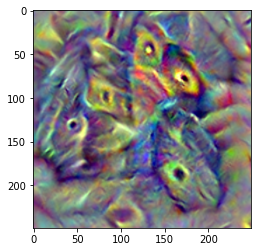

In [19]:
# base model 
pred = base_model.predict(x)
activation = tf.reduce_mean(pred[:, :, :, 0])
print(activation)

opt_param = featurevis.OptimizationParameters(3000, 0.65)
aug_param = featurevis.AugmentationParameters(blur= True, scale= True, pad_crop=False, flip=False,rotation=False, noise=False, color_aug=False)

loss, image, loss_record, activation = featurevis.visualize_filter(x, model, layer_name, channel_num, opt_param, aug_param)
name = "feature_vis_{}_{}_{}".format(model_name, layer_name, channel_num)
images.save_image(image, name=name)
image_reader.save_npy_as_png("{}.npy".format(name), output_folder)

print(activation)
plt.imshow(image)
plt.show()

In [20]:
# screen shot taken
from tensorflow.keras.preprocessing import image
img_dir = r'C:\Users\lucaz\Documents\Fuzhi\GitHub\luna\luna\outputs\loss_result'
filename = 'screenshot_mixed10_0.png'
img = image.load_img("{}\{}".format(img_dir, filename), target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

tf.Tensor(14.920431, shape=(), dtype=float32)
Starting Feature Vis Process
>> 100 %% 0 %%0 %% % % 1 % 1 % 1 % 1 %%%% 1 %%% 2 % 2 %%% 3 % 3 % 3 %%%% 3 %%% 4 %%% 4 %4 %% 4 %% 5 %%%% 5 % 5 %% 5 % 5 % 5 %% 6 % 6 %% 6 %% 7 %%%% 7 % 7 %% 7 % 8 %%% 9 %%% 9 % 9 % 10 % 10 %% 10 % 10 % 10 % 11 % 11 %% 11 %% 11 % 12 % 12 %% 12 % 12 % 12 %%%% 13 % 13 % 13 %% 13 % 13 % 13 % %%% 14 %%% 14 % 14 % 14 %% 15 % 15 % 15 % 15 %% 15 %%% % 16 % 16 % 16 % 16 %% 17 % 17 %% 17 % 17 %% 17 % 17 % 17 %% 18 %% 18 %18 % 18 % 18 %%%% 19 %% 19 %%%% 20 % 20 %%% 20 %%% 21 %%%%% 21 %% 21 %%%%%%% 22 % 22 % 22 %%%%% 23 %% 23 %% 23 %% 23 %%% % 24 % 24 % 24 % 24 % 24 %% 25 %%% 25 % 25 % 25 % % 25 %% 26 %26 % 26 % %% 26 % 26 %26 % 27 %27 %% 27 %%%27 %%%% 28 % 28 %%% 28 % 28 %% 29 %% 29 %%%% 29 %% 30 % 30 %%%%% 31 % 31 %% 31 % 31 % 31 % 32 %32 % 32 %% 32 %%% 33 %% 33 %%% 34 % 34 % 34 %%%%% 35 %%% 35 %% 36 % 36 %%% 37 % 37 %% 38 % 38 % 38 %%% 38 %% 38 %% % 39 %%% 39 % 39 %%% 39 % 39 % 40 % 40 %% 40 % 40 % %%%% %%%% 42 %%%%% % 4

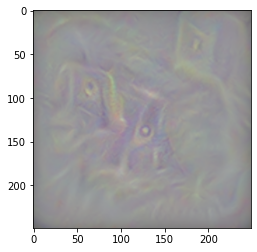

In [21]:
# base model 
pred = base_model.predict(x)
activation = tf.reduce_mean(pred[:, :, :, 0])
print(activation)

opt_param = featurevis.OptimizationParameters(3000, 0.65)
aug_param = featurevis.AugmentationParameters(blur= True, scale= True, pad_crop=False, flip=False,rotation=False, noise=False, color_aug=False)

loss, image, loss_record, activation = featurevis.visualize_filter(x, model, layer_name, channel_num, opt_param, aug_param)
name = "feature_vis_{}_{}_{}".format(model_name, layer_name, channel_num)
images.save_image(image, name=name)
image_reader.save_npy_as_png("{}.npy".format(name), output_folder)

print(activation)
plt.imshow(image)
plt.show()

In [22]:
# save image directly 
from tensorflow.keras.preprocessing import image
img_dir = r'C:\Users\lucaz\Documents\Fuzhi\GitHub\luna\luna\outputs\loss_result'
filename = 'save_image_mixed10_0.png'
img = image.load_img("{}\{}".format(img_dir, filename), target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

tf.Tensor(11.279087, shape=(), dtype=float32)
Starting Feature Vis Process
>> 100 % 0 % 0 %% 1 % 1 % 1 % 1 %%%% 2 % 2 %%% 2 % 2 %%% 3 %% 3 %%%% 3 %% 3 %%% 4 % 4 %%% 4 % 4 %%% 4 %%% 5 % 5 %%%% 5 % 5 % 5 % 5 %%% 6 % 6 % 6 % 6 %% 6 % 6 %%%%% 6 % 6 %%%% 7 %% 8 %%%% 8 %9 %%%%% 9 % 9 %% % 10 %% 10 % 11 % 11 %% 11 %% %%%%% 12 %%% 12 %%%%% 13 %% 13 %%%%%%% %% 15 %15 %16 % 16 %% % 16 %%% 17 %%%% 18 %% 18 %%%19 %%%% 20 %21 %% 21 % 21 %21 %%% 21 % 22 %% 22 % 22 % 23 % 23 % 23 % 23 % 23 % 23 %%% % 24 %% 24 % 24 % 25 % 25 % 25 % 25 % 25 %%% 25 % 25 % 25 %% 26 %% % 27 %27 % 27 % 28 % 28 % 28 %28 %%% 28 % 28 % %29 %% 29 %30 %30 % 30 %30 % 30 %% 31 %31 %%% 31 %% 31 % 31 %32 %%%32 % 32 % 32 % % 32 %%%% 33 %%%% 33 % 33 % 34 %%% 34 %%% % 35 % 35 %% 35 % 35 %%% 36 % 36 %%% 36 % 36 % 36 %%% 36 %%%% 37 % 37 % 37 %%%% 38 % 38 %% 39 % 39 %% 39 % 39 %% 39 % 39 % 40 % 40 %%% 40 %%%% 40 %%% %% 41 %% 41 %%%%%% 42 % 42 % 42 % 42 % 42 % 43 % 43 % 43 %%%% 44 %% 44 %% 44 %%%% 44 % 44 % 44 % 44 % 45 % 45 %%%% 45 % 46 

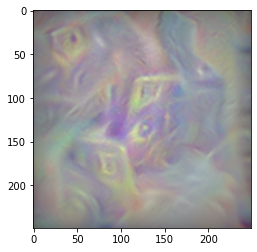

In [23]:
# base model 
pred = base_model.predict(x)
activation = tf.reduce_mean(pred[:, :, :, 0])
print(activation)

opt_param = featurevis.OptimizationParameters(3000, 0.65)
aug_param = featurevis.AugmentationParameters(blur= True, scale= True, pad_crop=False, flip=False,rotation=False, noise=False, color_aug=False)

loss, image, loss_record, activation = featurevis.visualize_filter(x, model, layer_name, channel_num, opt_param, aug_param)
name = "feature_vis_{}_{}_{}".format(model_name, layer_name, channel_num)
images.save_image(image, name=name)
image_reader.save_npy_as_png("{}.npy".format(name), output_folder)

print(activation)
plt.imshow(image)
plt.show()